Variable Notes:
	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
 - parch: The dataset defines family relations in this way...
   - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Dropping `Cabin` from train, test because large values are missing

In [8]:
train = train.drop(['Cabin'], axis=1)

In [9]:
test = test.drop(['Cabin'], axis=1)

### treatinf null values of train and test

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
age_mean = train.Age.mean()
train.Age.fillna(age_mean, axis=0, inplace=True)

In [12]:
embarked_mode = train.Embarked.mode()[0]
train.Embarked.fillna(embarked_mode, axis=0, inplace=True)

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [15]:
test.Age.fillna(age_mean, axis=0, inplace=True)

In [16]:
fare_mean = test.Fare.mean()
test.Fare.fillna(fare_mean, axis=0, inplace=True)

In [17]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

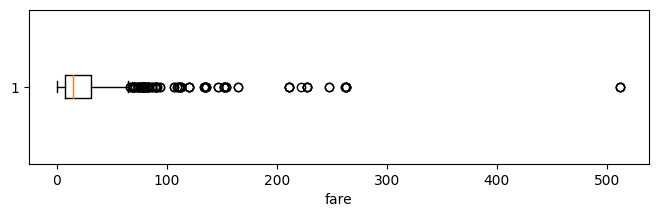

In [18]:
# plotting boxplot to check fare
plt.figure(figsize=(8,2))
plt.boxplot(train.Fare, vert=False)
plt.xlabel('fare')
plt.show()

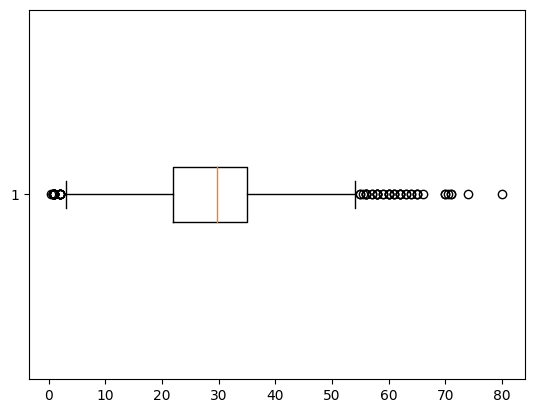

In [19]:
plt.boxplot(train['Age'], vert=False)
plt.show()

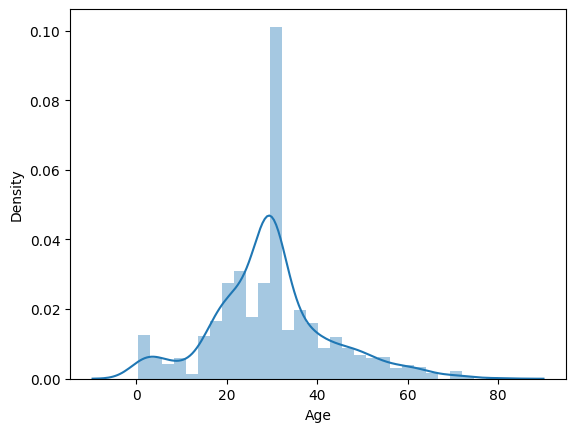

In [20]:
sns.distplot(train['Age'])
plt.show()

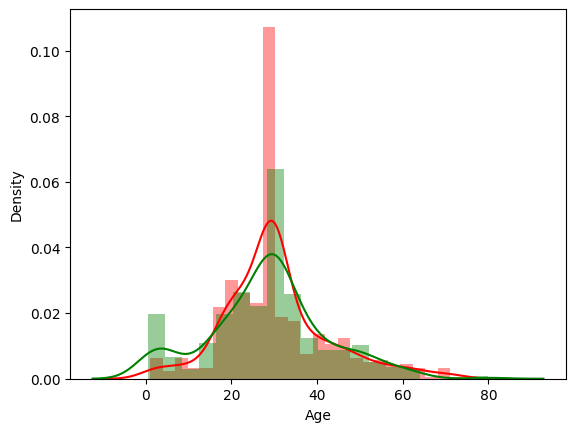

In [21]:
sns.distplot(train['Age'][train['Survived']==0], color='r')
sns.distplot(train['Age'][train['Survived']==1], color='g')

plt.show()

we can see from the plot that children were survived as comapre to middle age people this implies that age influence the analysis

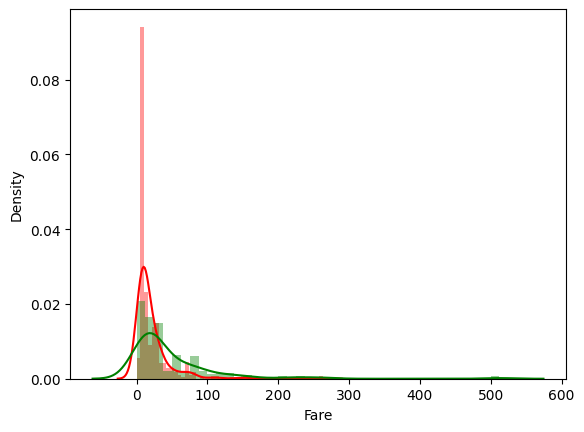

In [22]:
sns.distplot(train['Fare'][train['Survived']==0], color='r')
sns.distplot(train['Fare'][train['Survived']==1], color='g')
plt.show()

we can clearly see that the lower class people with cheap fare were not Survived as compared to rich people with high Fare

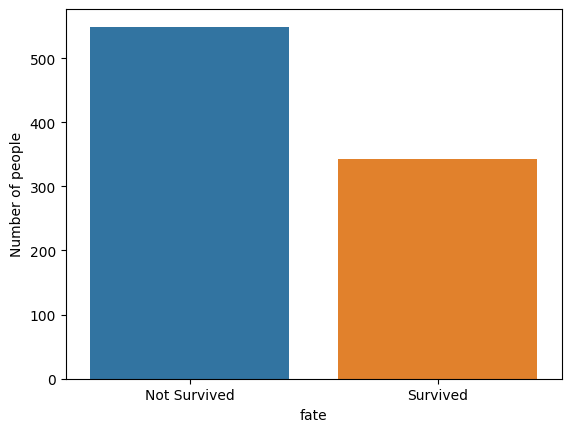

In [23]:
# lets check how many people survived 
sns.countplot(data = train, x='Survived')
plt.xticks([0,1],labels=['Not Survived', 'Survived'])
plt.xlabel('fate')
plt.ylabel('Number of people')
plt.show()

#### we have imbalanced data set means accuracy will not be our evaluation metric, we have to look at precision , and f1 score

In [24]:
# number of people survived per class
train.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [25]:
train.shape

(891, 11)

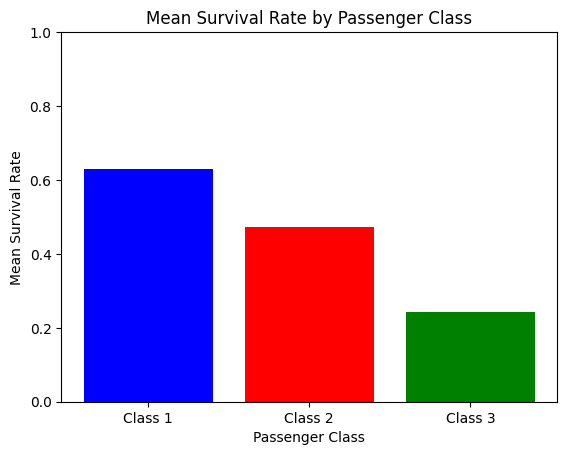

In [26]:
# Calculate the mean survival rate for each passenger class
mean_survival_rate_per_class = train.groupby('Pclass')['Survived'].mean()

# Plot the mean survival rate for each class
plt.bar(mean_survival_rate_per_class.index, mean_survival_rate_per_class.values, color=['b', 'r', 'g'])
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Passenger Class')
plt.xticks(mean_survival_rate_per_class.index, labels=['Class 1', 'Class 2', 'Class 3'])
plt.ylim(0, 1)  # Set y-axis limit to show percentages (0 to 100%)
plt.show()


In [27]:
# Number of people survived from wrt port of Embarkation
people_survived_port = train.groupby(['Embarked'])['Survived'].sum()
people_survived_port

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64

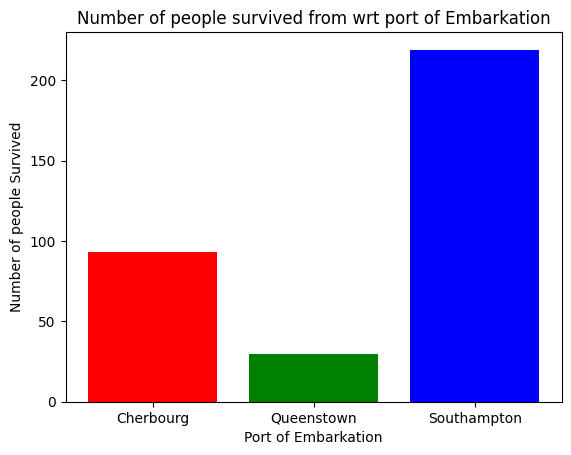

In [28]:
plt.bar(people_survived_port.index, people_survived_port.values, color=['r','g','b'])
plt.xticks(people_survived_port.index, ['Cherbourg', 'Queenstown', 'Southampton'])
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of people Survived')
plt.title('Number of people survived from wrt port of Embarkation')
plt.show()

In [29]:
sex_survived = train.groupby(['Sex'])['Survived'].mean()
sex_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

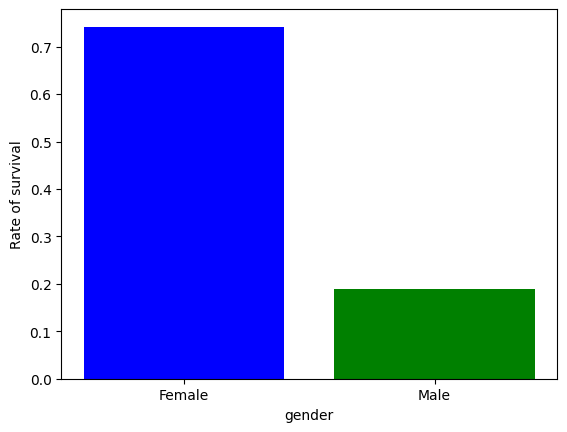

In [30]:
plt.bar(sex_survived.index, sex_survived.values,color=['b','g'])
plt.xticks(sex_survived.index, ['Female', 'Male'])
plt.xlabel('gender')
plt.ylabel('Rate of survival')
plt.show()

lets drop variables `PassengerId`,`Name`,`Ticket` from test and train as these variables add no importance to our analysis

In [31]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### store passenger id 

In [32]:
passengerID = test['PassengerId'].values

In [33]:
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [34]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### feature engineering 

lets create a feature `family` using `SibSp`, and `Parch`

In [35]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
train['Family'] = train['SibSp'] + train['Parch'] + 1

In [38]:
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [39]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [40]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Lets refrain `Family` column with family size such as `Single`, `Medium` and `Large`

In [41]:
def family_cal(number):
    if number == 1:
        return 'Alone'
    elif number >1 and number <5:
        return 'Medium'
    else:
        return 'Large'

In [42]:
train['family_size'] = train['Family'].apply(family_cal)

In [43]:
test['family_size'] = test['Family'].apply(family_cal)

In [44]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,0,3,male,22.0,1,0,7.2500,S,2,Medium
1,1,1,female,38.0,1,0,71.2833,C,2,Medium


In [45]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,3,male,34.5,0,0,7.8292,Q,1,Alone
1,3,female,47.0,1,0,7.0000,S,2,Medium


Now drop `SibSp`, `Parch` and `Family` and make easy to feed to algo

In [46]:
survival_via_family_size = train.groupby(['family_size'])['Survived'].mean()
survival_via_family_size

family_size
Alone     0.303538
Large     0.161290
Medium    0.578767
Name: Survived, dtype: float64

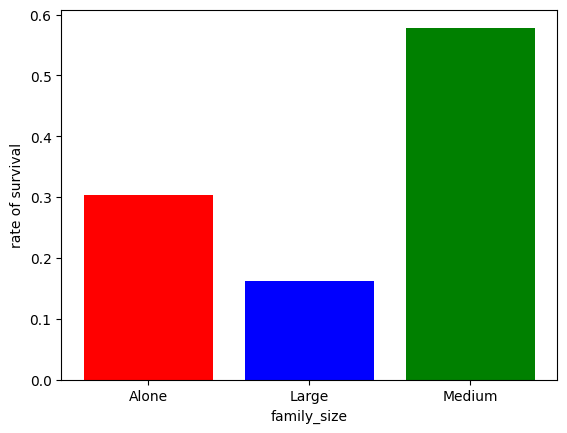

In [47]:
plt.bar(survival_via_family_size.index, survival_via_family_size.values, color=['r','b','g'])
plt.xlabel('family_size')
plt.ylabel('rate of survival')
plt.show()

In [48]:
train = train.drop(['SibSp', 'Parch', 'Family'], axis=1)

In [49]:
test = test.drop(['SibSp', 'Parch', 'Family'], axis=1)

In [50]:
train.shape

(891, 7)

In [51]:
test.shape

(418, 6)

In [100]:
train.to_csv('cleaned_train.csv', index=False)

## making pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (712, 6)
x_test shape : (179, 6)
y_train shape : (712,)
y_test shape : (179,)


In [56]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object')

In [57]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object')

In [58]:
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'),['Sex','Embarked', 'family_size'])
], remainder= 'passthrough')
# scaling
trf2 = ColumnTransformer([
    ('scale', StandardScaler(), [9,10])
], remainder= 'passthrough')

In [59]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
])

In [60]:
from sklearn import set_config
set_config(display='diagram')

In [61]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Sex', 'Embarked',
                                                   'family_size'])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  [9, 10])]))])

In [62]:
x_train.shape

(712, 6)

In [63]:
x_train_process = pipe.fit_transform(x_train)

In [64]:
x_train_process.shape

(712, 11)

In [65]:
x_test_process = pipe.transform(x_test)

In [66]:
x_test_process.shape

(179, 11)

# model building

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
gnb.fit(x_train_process, y_train)

GaussianNB()

In [69]:
y_pred = gnb.predict(x_test_process)
print(f' accuracy = {accuracy_score(y_test, y_pred)}')
print(f' f1_score = {f1_score(y_test, y_pred)}')
print(f' precision = {precision_score(y_test, y_pred)}')
print(f' confusion_matrix :\n {confusion_matrix(y_test, y_pred)}')

 accuracy = 0.776536312849162
 f1_score = 0.7297297297297297
 precision = 0.7297297297297297
 confusion_matrix :
 [[85 20]
 [20 54]]


In [70]:
lr = LogisticRegression()

lr.fit(x_train_process, y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(x_test_process)
print(f' accuracy = {accuracy_score(y_test, y_pred)}')
print(f' f1_score = {f1_score(y_test, y_pred)}')
print(f' precision = {precision_score(y_test, y_pred)}')
print(f' confusion_matrix :\n {confusion_matrix(y_test, y_pred)}')

 accuracy = 0.8044692737430168
 f1_score = 0.7552447552447553
 precision = 0.782608695652174
 confusion_matrix :
 [[90 15]
 [20 54]]


In [72]:
rf = RandomForestClassifier()
rf.fit(x_train_process, y_train)

RandomForestClassifier()

In [73]:
y_pred = rf.predict(x_test_process)
print(f' accuracy = {accuracy_score(y_test, y_pred)}')
print(f' f1_score = {f1_score(y_test, y_pred)}')
print(f' precision = {precision_score(y_test, y_pred)}')
print(f' confusion_matrix :\n {confusion_matrix(y_test, y_pred)}')

 accuracy = 0.8156424581005587
 f1_score = 0.7755102040816327
 precision = 0.7808219178082192
 confusion_matrix :
 [[89 16]
 [17 57]]


In [74]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Initialize an empty list to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_process, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_process)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("For ", model_name)
    print("Accuracy - ", accuracy)
    print("Precision - ", precision)
    print("f1_score - ", f1)
    print("--------------------------------->")
    # Append results to the list
    results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

For  Logistic Regression
Accuracy -  0.8044692737430168
Precision -  0.782608695652174
f1_score -  0.7552447552447553
--------------------------------->
For  Random Forest
Accuracy -  0.8044692737430168
Precision -  0.7671232876712328
f1_score -  0.761904761904762
--------------------------------->
For  GaussianNB
Accuracy -  0.776536312849162
Precision -  0.7297297297297297
f1_score -  0.7297297297297297
--------------------------------->
For  Decision Tree
Accuracy -  0.7597765363128491
Precision -  0.6962025316455697
f1_score -  0.7189542483660132
--------------------------------->
For  SVM
Accuracy -  0.8156424581005587
Precision -  0.8059701492537313
f1_score -  0.7659574468085106
--------------------------------->


In [75]:
results_df

,Model,Accuracy,Precision,F1 Score
0,Logistic Regression,0.804469,0.782609,0.755245
1,Random Forest,0.804469,0.767123,0.761905
2,GaussianNB,0.776536,0.729730,0.729730
3,Decision Tree,0.759777,0.696203,0.718954
4,SVM,0.815642,0.805970,0.765957


In [76]:
model_df = pd.melt(results_df, id_vars = 'Model')

In [77]:
model_df

,Model,variable,value
0,Logistic Regression,Accuracy,0.804469
1,Random Forest,Accuracy,0.804469
2,GaussianNB,Accuracy,0.776536
3,Decision Tree,Accuracy,0.759777
4,SVM,Accuracy,0.815642
5,Logistic Regression,Precision,0.782609
6,Random Forest,Precision,0.767123
7,GaussianNB,Precision,0.729730
8,Decision Tree,Precision,0.696203
9,SVM,Precision,0.805970


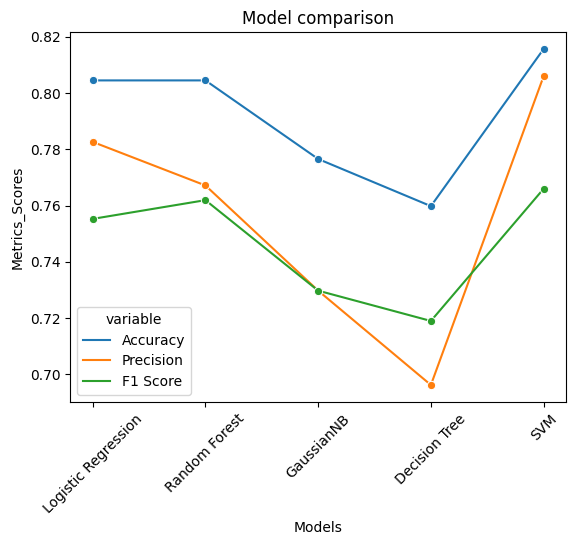

In [78]:
sns.lineplot(data= model_df, x='Model', y='value',hue='variable',marker='o')
plt.xticks(rotation=45)
plt.title('Model comparison')
plt.xlabel('Models')
plt.ylabel('Metrics_Scores')
plt.show()

## hyper-parameter tuning

### using grid search cv

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Defining hyperparameter for each model
pg_logreg = {'C': [0.001,0.1, 1.0, 10, 100, 200], 'penalty': ['l1','l2']}
pg_rf = {'n_estimators': [50, 100, 200, 500], 'max_depth':[None,5, 10, 20]}
pg_dt = {'max_depth': [None,5, 10], 'min_samples_split': [2, 5, 10, 20,50,100]}
pg_svm = {'C': [0.1, 1.0, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [0.1, 1.0, 10]}

In [81]:
# Models with their corresponding hyperparameters
models_with_params = {
    'Logistic Regression': (LogisticRegression(), pg_logreg),
    'Random Forest': (RandomForestClassifier(), pg_rf),
    'Decision Tree': (DecisionTreeClassifier(), pg_dt),
    'SVM': (SVC(), pg_svm)
}

In [82]:
# Initialize an empty list to store results
tuned_results = []

In [83]:
# Hyperparameter tuning for each model
for model_name, (model, param_grid) in models_with_params.items():
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
    grid_search.fit(x_train_process, y_train)
    
    # Best hyperparameters
    best_params = grid_search.best_params_
    
    # Train the model with the best hyperparameters
    best_model = grid_search.best_estimator_
    best_model.fit(x_train_process, y_train)
    
    # Predict on the test set
    y_pred = best_model.predict(x_test_process)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("For ", model_name)
    print('best_params - ',best_params)
    print("Accuracy - ", accuracy)
    print("Precision - ", precision)
    print("f1_score - ", f1)
    print(30*"-"+'>')
    # Append results to the list
    tuned_results.append({'Model': model_name, 'Best Hyperparameters': best_params,
                          'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1})

For  Logistic Regression
best_params -  {'C': 1.0, 'penalty': 'l2'}
Accuracy -  0.8044692737430168
Precision -  0.782608695652174
f1_score -  0.7552447552447553
------------------------------>
For  Random Forest
best_params -  {'max_depth': 5, 'n_estimators': 50}
Accuracy -  0.8044692737430168
Precision -  0.8
f1_score -  0.7482014388489208
------------------------------>
For  Decision Tree
best_params -  {'max_depth': 10, 'min_samples_split': 10}
Accuracy -  0.8324022346368715
Precision -  0.84375
f1_score -  0.7826086956521738
------------------------------>
For  SVM
best_params -  {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy -  0.8100558659217877
Precision -  0.803030303030303
f1_score -  0.7571428571428571
------------------------------>


In [84]:
# Create a DataFrame from the results
tuned_results_df = pd.DataFrame(tuned_results)

In [85]:
tuned_results_df

,Model,Best Hyperparameters,Accuracy,Precision,F1 Score
0,Logistic Regression,"{'C': 1.0, 'penalty': 'l2'}",0.804469,0.782609,0.755245
1,Random Forest,"{'max_depth': 5, 'n_estimators': 50}",0.804469,0.800000,0.748201
2,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.832402,0.843750,0.782609
3,SVM,"{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}",0.810056,0.803030,0.757143


In [86]:
tuned_model_df = pd.melt(tuned_results_df, id_vars='Model').iloc[4:,:]

In [87]:
tuned_model_df

,Model,variable,value
4,Logistic Regression,Accuracy,0.804469
5,Random Forest,Accuracy,0.804469
6,Decision Tree,Accuracy,0.832402
7,SVM,Accuracy,0.810056
8,Logistic Regression,Precision,0.782609
9,Random Forest,Precision,0.8
10,Decision Tree,Precision,0.84375
11,SVM,Precision,0.80303
12,Logistic Regression,F1 Score,0.755245
13,Random Forest,F1 Score,0.748201


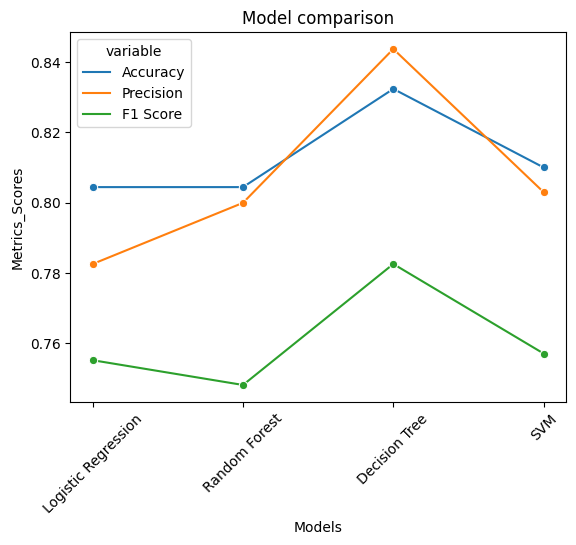

In [88]:
sns.lineplot(data= tuned_model_df, x='Model', y='value',hue='variable',marker='o')
plt.xticks(rotation=45)
plt.title('Model comparison')
plt.xlabel('Models')
plt.ylabel('Metrics_Scores')
plt.show()

In [89]:
import pickle

# Identify the best-performing model (Random Forest)
best_model_row = tuned_results_df[tuned_results_df['Model'] == 'Decision Tree'].iloc[0]
best_hyperparameters = best_model_row['Best Hyperparameters']

# Train the Random Forest model with the best hyperparameters using the entire dataset
best_model = DecisionTreeClassifier(**best_hyperparameters)
best_model.fit(x_train_process, y_train)

# save the preprocessing step
with open('pipe.pkl', 'wb') as pipe_file:
    pickle.dump(pipe, pipe_file)
# Save the trained Random Forest model using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Display a message indicating successful model save
print('Pipe and decision Tree model saved successfully.')


Pipe and decision Tree model saved successfully.


# predicting on test data

In [90]:
import pickle
# loading best model
with open('best_model.pkl', 'rb') as model_file:
    best_rf_model = pickle.load(model_file)
    
# loading the pipe
with open('pipe.pkl', 'rb') as pipe_file:
    pipe = pickle.load(pipe_file)

In [91]:
test.sample()

,Pclass,Sex,Age,Fare,Embarked,family_size
313,3,female,37.0,7.75,Q,Alone


In [92]:
# Predict on the test set
test_process = pipe.transform(test)

In [93]:
y_pred = best_rf_model.predict(test_process)

In [94]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
test.sample()

,Pclass,Sex,Age,Fare,Embarked,family_size
191,1,male,29.699118,26.0,S,Alone


In [96]:
id = passengerID
submission = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
submission.to_csv('prediction.csv', index=False)

In [98]:
# m = train.drop(['Survived'], axis=1)
# n = train['Survived']

# m_pro = pipe.fit_transform(m)

# sv = SVC()
# sv.fit(m_pro,n)

# y_pred1 = sv.predict(test_process)

# y_pred1

# id = passengerID
# submission2 = pd.DataFrame({
#     'PassengerId': id,
#     'Survived': y_pred1
# })

# submission2.head()

# submission2.to_csv('prediction2.csv', index=False)